<a href="https://colab.research.google.com/github/aryxns/webrtcapp/blob/main/time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

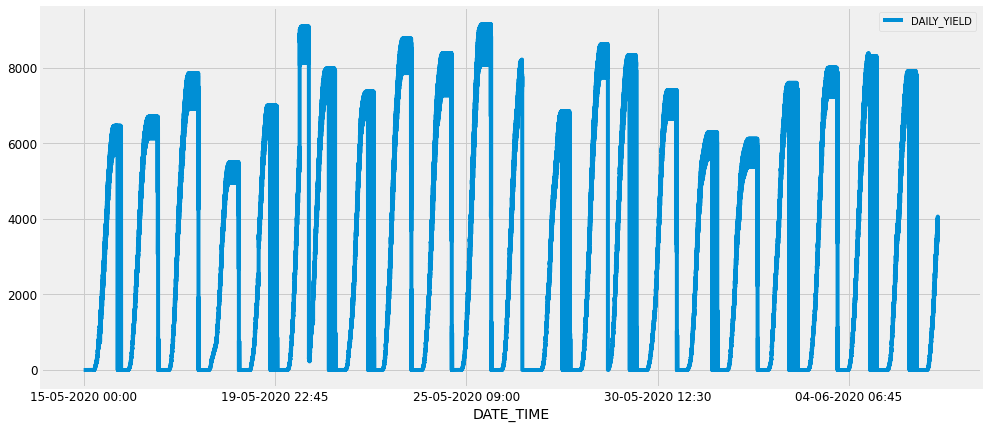

In [65]:
df = pd.read_csv('plant1.csv')
df.head()
ndf = df.drop(["PLANT_ID","AC_POWER", "DC_POWER", "SOURCE_KEY", "TOTAL_YIELD"], axis = 1)
ndf.describe()
ndf.set_index('DATE_TIME', inplace=True)
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
ndf.plot()

In [72]:
ndf.head(1000)

,DAILY_YIELD
DATE_TIME,
15-05-2020 00:00,0.000000
15-05-2020 00:00,0.000000
15-05-2020 00:00,0.000000
15-05-2020 00:00,0.000000
15-05-2020 00:00,0.000000
...,...
15-05-2020 11:30,2242.000000
15-05-2020 11:30,2518.714286
15-05-2020 11:30,2252.285714


In [56]:
!python -m pip install statsmodels

In [73]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(ndf['DAILY_YIELD'])

In [61]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary")


adfuller_test(df['AC_POWER'])

ADF Test Statistic : nan
p-value : nan
#Lags Used : 0
Number of Observations : 44651
weak evidence against null hypothesis,indicating it is non-stationary
